In [ ]:
# Start writing code here...from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')


Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

"""
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
"""
spotify_data_cleaned = spotify_songs
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
spotify_data_cleaned.track_album_release_year = spotify_data_cleaned.track_album_release_year.astype("int64")
"""
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]
"""


'\nmask = (spotify_data_cleaned.track_popularity > 0)\nspotify_data_cleaned = spotify_data_cleaned.loc[mask]\n'

In [ ]:
spotify_data_cleaned

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_month,track_album_release_year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,06,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,12,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,07,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,07,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,04,2014
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,03,2013
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,04,2014
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,01,2014


In [ ]:
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]


mask1 = spotify_data_cleaned.track_popularity <= 80
mask2 = spotify_data_cleaned.track_popularity <=60
mask3 = spotify_data_cleaned.track_popularity <=40
mask4 = spotify_data_cleaned.track_popularity <=20

spotify_data_cleaned["popularity_quali"] = "trèsPopulaire"
spotify_data_cleaned.loc[mask1,"popularity_quali"] = "bienPopulaire"
spotify_data_cleaned.loc[mask2,"popularity_quali"] = "moyennementPopulaire"
spotify_data_cleaned.loc[mask3,"popularity_quali"] = "bofPopulaire"
spotify_data_cleaned.loc[mask4,"popularity_quali"] = "pasPopulaire"


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalisation(data):
    columns = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
    data_norme = data[columns]
    scaler = MinMaxScaler(feature_range=(0,1))
    data_norme = pd.DataFrame(scaler.fit_transform(data_norme), columns=columns)
    return data_norme


## Exploration

**D'abord, visualisation de la fréquence du nombres de musiques (présentes dans les playlists) par artiste**

Note : on vire les 400 premieres valeurs pour y voir plus clair

Martin Garrix           153
Queen                   133
The Chainsmokers        121
David Guetta            106
Drake                    98
                       ... 
Patternist                1
Simply Red                1
Exact Change Project      1
Jordan Jay                1
Niva                      1
Name: track_artist, Length: 10026, dtype: int64


Text(0.5, 0, 'number of songs')

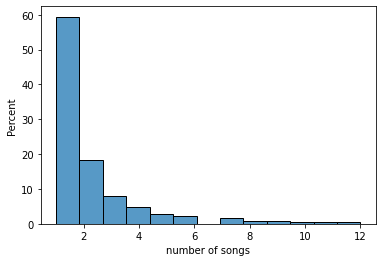

In [ ]:
artist_frequency = spotify_data_cleaned["track_artist"].value_counts()
print(artist_frequency)
sns.histplot(x=artist_frequency[400:],bins=13, stat="percent")
plt.xlabel("number of songs")


In [ ]:
for i in range(5):
    i=i+1
    sub_df = artist_frequency[artist_frequency == i ]
    print("Pourcentage d'artistes qui ont ",i, " chansons : ", sub_df.sum()/spotify_data_cleaned.shape[0]*100,"%")

sub_df = artist_frequency[artist_frequency <= 6 ]
print("Pourcentage artistes avec moins de 6 chansons : ", sub_df.sum()/spotify_data_cleaned.shape[0]*100,"%")

sub_df = artist_frequency[artist_frequency <= 17 ]
print("Pourcentage artistes avec moins de 17 chansons : ", sub_df.sum()/spotify_data_cleaned.shape[0]*100,"%")

#sns.boxplot( artist_frequency[artist_frequency < 10 ])

Pourcentage d'artistes qui ont  1  chansons :  18.99435778294059 %
Pourcentage d'artistes qui ont  2  chansons :  11.636242947228675 %
Pourcentage d'artistes qui ont  3  chansons :  7.517424493859941 %
Pourcentage d'artistes qui ont  4  chansons :  6.0006637902422835 %
Pourcentage d'artistes qui ont  5  chansons :  4.580152671755725 %
Pourcentage artistes avec moins de 6 chansons :  52.77132426153336 %
Pourcentage artistes avec moins de 17 chansons :  74.64985064719548 %


In [ ]:
np.median(artist_frequency)

1.0

On va partir sur le fait qu'avoir fait moins de 6 chansons signifie que l'artiste a peu de chansons et vice versa

In [ ]:
limite = 6 

## Test du chi2 indépendance entre popularité d'une chanson et le fait d'être un "gros" artiste

**On crée deux tableaux : un avec les petits artistes et un avec les gros artistes**

In [ ]:
index = artist_frequency[artist_frequency <= limite ].reset_index()["index"]
few_song_artist_name = []
for artist in index:
    few_song_artist_name.append(artist)
few_song_artist_name

['Zoé',
 'Debra Killings',
 'Tymek',
 'BLACHA',
 'Helion',
 'Kurupt',
 'Lit Killah',
 'Tungevaag',
 'Caravan Palace',
 'Dennis Lloyd',
 'a-ha',
 'MZ',
 'Pekeño 77',
 'Sa4',
 'Chivv',
 'Momo Soundz',
 'Machine Gun Kelly',
 'Gary Moore',
 'The Guess Who',
 'The Bloody Beetroots',
 'Grouplove',
 'Madison Beer',
 'Silvestre Dangond',
 'Sinead Harnett',
 'Odd Chap',
 'Miguel Bosé',
 'Alejandro Sanz',
 'Fat Joe',
 'LMFAO',
 'Brent Faiyaz',
 'Coolio',
 'Darell',
 'Skillet',
 'Jacob Tillberg',
 'O.T. Genasis',
 'Diviners',
 'Feid',
 'Glass Animals',
 'The Band CAMINO',
 'Roberto Marín Muñoz',
 'gizmo',
 'MGMT',
 'Placebo',
 'Chingy',
 'Ashanti',
 'DJ Mibor',
 'Hillsong Young & Free',
 'Silkk The Shocker',
 'Nappy Roots',
 'Pedro Capó',
 'DJ DMD',
 'JP Saxe',
 'Bad Gyal',
 'Mountain',
 'Hozier',
 'Fred Hammond',
 'Lou Reed',
 'Simple Plan',
 'Mon Laferte',
 'Jazzinuf',
 'Grimes',
 'Foxa',
 'Vikström',
 'Snakehips',
 'St. Viper',
 'Johnnie Taylor',
 'Dfideliz',
 'Gregor Salto',
 'Glenn Gatsby',


In [ ]:
index = artist_frequency[artist_frequency > limite ].reset_index()["index"]
many_song_artist_name = []
for artist in index:
    many_song_artist_name.append(artist)
many_song_artist_name

['Martin Garrix',
 'Queen',
 'The Chainsmokers',
 'David Guetta',
 'Drake',
 'Don Omar',
 'Calvin Harris',
 'Kygo',
 'Hardwell',
 'Dimitri Vegas & Like Mike',
 "Guns N' Roses",
 'The Weeknd',
 'Avicii',
 'J Balvin',
 'Ed Sheeran',
 'Maroon 5',
 'Logic',
 'Bad Bunny',
 'Major Lazer',
 'Daddy Yankee',
 'Post Malone',
 'Khalid',
 'DJ Snake',
 'Ozuna',
 '2Pac',
 'Tiësto',
 'Ariana Grande',
 'Rihanna',
 'Zedd',
 'Shawn Mendes',
 'オメガトライブ',
 'Selena Gomez',
 'Armin van Buuren',
 'Wisin & Yandel',
 'Nicky Jam',
 'Coldplay',
 'Marshmello',
 'R3HAB',
 'Katy Perry',
 'Alan Walker',
 'The Notorious B.I.G.',
 'Scorpions',
 'Future',
 'The Cranberries',
 'Young Thug',
 'Sam Feldt',
 'Van Halen',
 'Billie Eilish',
 'Steve Aoki',
 'Gloria Estefan',
 'Eminem',
 'OutKast',
 'Jonas Blue',
 'Imagine Dragons',
 'Tyga',
 'Frank Ocean',
 'Halsey',
 '50 Cent',
 'Cypress Hill',
 'Sia',
 'Galantis',
 'Camila Cabello',
 'Aerosmith',
 'Janet Jackson',
 'Snoop Dogg',
 'The Game',
 'Lil Wayne',
 'The Who',
 'Travi

In [ ]:
data_artist = spotify_data_cleaned

In [ ]:

for artist in few_song_artist_name:
    mask = data_artist["track_artist"] == artist
    data_artist.loc[mask,"has_a_big_repertoire"] = 0

for artist in many_song_artist_name:
    mask = data_artist["track_artist"] == artist
    data_artist.loc[mask,"has_a_big_repertoire"] = 1


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
mask_many = data_artist.has_a_big_repertoire == 1
many_songs_artist = data_artist[mask_many]
mask_few = data_artist.has_a_big_repertoire == 0
few_songs_artist = data_artist[mask_few]


In [ ]:
popularity_few = few_songs_artist["popularity_quali"].value_counts()
popularity_many = many_songs_artist["popularity_quali"].value_counts()
print(popularity_few)
print(popularity_many)

moyennementPopulaire    5946
bofPopulaire            4668
bienPopulaire           2733
pasPopulaire            2446
trèsPopulaire            107
Name: popularity_quali, dtype: int64
bienPopulaire           4869
moyennementPopulaire    3771
pasPopulaire            2280
bofPopulaire            2077
trèsPopulaire           1233
Name: popularity_quali, dtype: int64


In [ ]:
"""popularity_few = few_songs_artist["playlist_genre"].value_counts()
popularity_many = many_songs_artist["playlist_genre"].value_counts()
print(popularity_few)
print(popularity_many)"""

'popularity_few = few_songs_artist["playlist_genre"].value_counts()\npopularity_many = many_songs_artist["playlist_genre"].value_counts()\nprint(popularity_few)\nprint(popularity_many)'

**On peut maintenant faire le test du chi2 sur la proportion des données selon la popularité et le fait d'être un gros artiste**

In [ ]:
#pip install spicy

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
cont = np.array(
    [popularity_few,
    popularity_many]
)
cont

array([[5946, 4668, 2733, 2446,  107],
       [4869, 3771, 2280, 2077, 1233]])

In [ ]:
"""cont = np.array(
    [[5,9,6],
    [10,20,10],
    [0,1,9],
    [5,20,5],    
    ]
)"""
#https://www.deschamps.io/236-realiser-un-test-dindependance-chi2-en-python-avec-scipy-stats


'cont = np.array(\n    [[5,9,6],\n    [10,20,10],\n    [0,1,9],\n    [5,20,5],    \n    ]\n)'

In [ ]:
"""cont = np.array(
    [
    [50,70,110,60],
    [60,75,100,50],    
    ]
)"""

'cont = np.array(\n    [\n    [50,70,110,60],\n    [60,75,100,50],    \n    ]\n)'

In [ ]:
st_chi2, st_p, st_dof, st_exp = chi2_contingency(cont)


In [ ]:
print(st_chi2,st_dof,"\n",st_p)

1130.723069523791 4 
 1.6584367867068548e-243


In [ ]:
st_exp

array([[5707.21871888, 4453.37205443, 2645.42648523, 2386.84699635,
         707.1357451 ],
       [5107.78128112, 3985.62794557, 2367.57351477, 2136.15300365,
         632.8642549 ]])

p value très très proche de 0, on peut rejeuter l'hypothèse nulle : les variables ne sont pas indépendantes

<AxesSubplot:xlabel='playlist_genre', ylabel='count'>

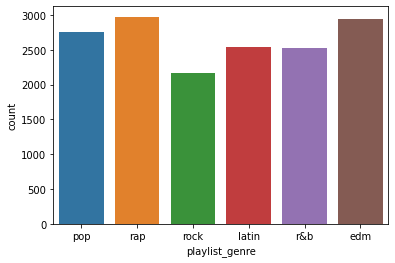

In [ ]:
sns.countplot(x=few_songs_artist.playlist_genre)

<AxesSubplot:xlabel='playlist_genre', ylabel='count'>

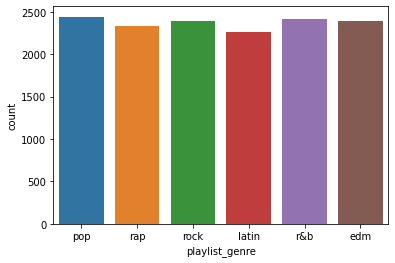

In [ ]:
sns.countplot(x=many_songs_artist.playlist_genre)

## Etude du nombre de genre par (gros) artiste

In [ ]:
TotalNbGenre = 0
NbArtist = 0
unSeulGenre = 0
for artist in many_song_artist_name:
   mask = data_artist["track_artist"] == artist
   data_by_artist = many_songs_artist[mask]
   count_genre_by_artist = data_by_artist["playlist_genre"].value_counts()
   TotalNbGenre += count_genre_by_artist.shape[0]
   NbArtist = NbArtist + 1
   if(count_genre_by_artist.shape[0]==1):
      unSeulGenre = unSeulGenre +1
print("Moyenne du nombre de genre par (gros) artiste: ", TotalNbGenre / NbArtist)
print("Nombre de gros artistes: ", NbArtist)
print("Nombre d'artiste ayant un seul genre :", unSeulGenre)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
Moyenne du nombre de genre par (gros) artiste:  2.2465277777777777
Nombre de gros artistes:  864
Nombre d'artiste ayant un seul genre : 315


Note : vérification que l'on ait bien une répartition 50-50 de musiques produites par un gros et un petit artiste

In [ ]:
few_songs_artist.shape[0]/spotify_data_cleaned.shape[0]

0.5277132426153336

## Récuperer le nombre de musique par genre par artiste

In [ ]:
genre_list = ["rap","rock","r&b","latin","edm","pop"]
artist_info = pd.DataFrame(columns=genre_list,index=many_song_artist_name)

for artist in many_song_artist_name:
   nb_musics_for_the_artist = 0
   mask = data_artist["track_artist"] == artist
   data_by_artist = many_songs_artist[mask]
   count_genre_by_artist = data_by_artist["playlist_genre"].value_counts()
   for genre in genre_list:
        try:
            artist_info.loc[artist][genre] = count_genre_by_artist[genre]
            nb_musics_for_the_artist += count_genre_by_artist[genre]
        except:
            artist_info.loc[artist][genre] = 0

    #faire le pourcentage
   for genre in genre_list:
        artist_info.loc[artist][genre] = artist_info.loc[artist][genre] / nb_musics_for_the_artist
    
    


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
artist_info

,rap,rock,r&b,latin,edm,pop
Martin Garrix,0.006536,0.0,0.006536,0.019608,0.771242,0.196078
Queen,0.0,0.984962,0.0,0.0,0.0,0.015038
The Chainsmokers,0.049587,0.0,0.082645,0.090909,0.396694,0.380165
David Guetta,0.018868,0.0,0.0,0.037736,0.528302,0.415094
Drake,0.367347,0.0,0.326531,0.122449,0.05102,0.132653
...,...,...,...,...,...,...
Grand Funk Railroad,0.0,1.0,0.0,0.0,0.0,0.0
Contiez,0.0,0.0,0.0,0.0,1.0,0.0
Dada Life,0.0,0.0,0.0,0.0,1.0,0.0
Broederliefde,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
for artist in many_song_artist_name:

    mask = many_songs_artist["track_artist"] == artist
    many_songs_artist.loc[mask,"nb_rap_songs_for_this_artist"] = artist_info.loc[artist]["rap"]
    many_songs_artist.loc[mask,"nb_rock_songs_for_this_artist"] = artist_info.loc[artist]["rock"]
    many_songs_artist.loc[mask,"nb_rnb_songs_for_this_artist"] = artist_info.loc[artist]["r&b"]
    many_songs_artist.loc[mask,"nb_latin_songs_for_this_artist"] = artist_info.loc[artist]["latin"]
    many_songs_artist.loc[mask,"nb_pop_songs_for_this_artist"] = artist_info.loc[artist]["pop"]
    many_songs_artist.loc[mask,"nb_edm_songs_for_this_artist"] = artist_info.loc[artist]["edm"]



/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
many_songs_artist

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,track_album_release_month,track_album_release_year,popularity_quali,has_a_big_repertoire,nb_rap_songs_for_this_artist,nb_rock_songs_for_this_artist,nb_rnb_songs_for_this_artist,nb_latin_songs_for_this_artist,nb_pop_songs_for_this_artist,nb_edm_songs_for_this_artist
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,06,2019,bienPopulaire,1.0,0.000000,0.0,0.205882,0.294118,0.279412,0.220588
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,12,2019,bienPopulaire,1.0,0.000000,0.0,0.058824,0.279412,0.470588,0.191176
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,07,2019,bienPopulaire,1.0,0.035714,0.0,0.071429,0.071429,0.607143,0.214286
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,07,2019,moyennementPopulaire,1.0,0.049587,0.0,0.082645,0.090909,0.380165,0.396694
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,03,2019,bienPopulaire,1.0,0.000000,0.0,0.238095,0.238095,0.380952,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32820,4BwaVpGVeCBh8qeQ1hk2my,Leaving You - Thomas Newson Radio Edit,Audien,16,06wngxHMJd8kIjtAwcxFkh,Leaving You (Remixes - Part 1),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,10,2013,pasPopulaire,1.0,0.000000,0.0,0.000000,0.000000,0.250000,0.750000
32823,0coMLoVcagZPGF5zxc5RF8,Everybody Is In The Place - Radio Edit,Hardwell,28,1PdMbB6qgSzS9zcT9xP6Kx,Everybody Is In The Place (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,04,2014,bofPopulaire,1.0,0.012048,0.0,0.000000,0.012048,0.072289,0.903614
32824,3zKST4nk4QJE77oLjUZ0Ng,Hey Brother,Avicii,20,02h9kO2oLKnLtycgbElKsw,True,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,01,2013,pasPopulaire,1.0,0.013889,0.0,0.027778,0.027778,0.555556,0.375000
32825,2EpS5TgdngSISM63rhBsnK,Booyah - Radio Edit,Showtek,47,0Dix8CfvtZEHUyJGnmPnaB,Booyah,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,01,2013,moyennementPopulaire,1.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalisation(data):
    columns = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
    data_norme = data[columns]
    scaler = MinMaxScaler(feature_range=(0,1))
    data_norme = pd.DataFrame(scaler.fit_transform(data_norme), columns=columns)
   
    return data_norme


In [ ]:
data_normed = normalisation(many_songs_artist)

In [ ]:
many_songs_artist["nb_rnb_songs_for_this_artist"]

0        0.205882
1        0.058824
2        0.071429
3        0.082645
4        0.238095
           ...   
32820    0.000000
32823    0.000000
32824    0.027778
32825    0.000000
32826    0.000000
Name: nb_rnb_songs_for_this_artist, Length: 14230, dtype: float64

In [ ]:
many_songs_artist["nb_rnb_songs_for_this_artist"].shape[0]

14230

In [ ]:
print(np.any(many_songs_artist["nb_rnb_songs_for_this_artist"]))

True


In [ ]:
many_songs_artist.reset_index(inplace=True)

In [ ]:
data_normed["nb_rap_songs_for_this_artist"] = many_songs_artist["nb_rap_songs_for_this_artist"]
data_normed["nb_rnb_songs_for_this_artist"] = many_songs_artist["nb_rnb_songs_for_this_artist"] 
data_normed["nb_rock_songs_for_this_artist"] = many_songs_artist["nb_rock_songs_for_this_artist"] 
data_normed["nb_pop_songs_for_this_artist"] = many_songs_artist["nb_pop_songs_for_this_artist"] 
data_normed["nb_latin_songs_for_this_artist"] = many_songs_artist["nb_latin_songs_for_this_artist"] 
data_normed["nb_edm_songs_for_this_artist"] = many_songs_artist["nb_edm_songs_for_this_artist"] 

In [ ]:
data_normed

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,nb_rap_songs_for_this_artist,nb_rnb_songs_for_this_artist,nb_rock_songs_for_this_artist,nb_pop_songs_for_this_artist,nb_latin_songs_for_this_artist,nb_edm_songs_for_this_artist
0,0.656566,0.729634,0.915316,0.874015,0.042405,0.102819,0.000000,0.056697,0.511302,0.395502,0.335796,0.982456,0.000000,0.205882,0.0,0.279412,0.294118,0.220588
1,0.666667,0.703660,0.811009,0.784217,0.017600,0.072980,0.004283,0.352347,0.694433,0.259300,0.269688,0.982456,0.000000,0.058824,0.0,0.470588,0.279412,0.191176
2,0.696970,0.643447,0.930807,0.843326,0.061186,0.080036,0.000024,0.102003,0.610716,0.407676,0.298505,0.982456,0.035714,0.071429,0.0,0.607143,0.071429,0.214286
3,0.595960,0.694215,0.929774,0.830020,0.094023,0.028927,0.000010,0.197276,0.259104,0.395008,0.283037,0.982456,0.049587,0.082645,0.0,0.380165,0.090909,0.396694
4,0.686869,0.613932,0.829598,0.795639,0.015946,0.080944,0.000000,0.074941,0.727920,0.407478,0.324073,0.982456,0.000000,0.238095,0.0,0.380952,0.238095,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14225,0.151515,0.526564,0.913250,0.820059,0.048429,0.047375,0.006918,0.175991,0.688154,0.431948,0.320882,0.877193,0.000000,0.000000,0.0,0.250000,0.000000,0.750000
14226,0.272727,0.565525,0.990705,0.840326,0.075951,0.000433,0.222787,0.062981,0.006697,0.444949,0.288391,0.894737,0.012048,0.000000,0.0,0.072289,0.012048,0.903614
14227,0.191919,0.489965,0.774863,0.788140,0.025041,0.031145,0.000047,0.074434,0.448514,0.413886,0.459853,0.877193,0.013889,0.027778,0.0,0.555556,0.027778,0.375000
14228,0.464646,0.506494,0.915316,0.858016,0.047484,0.045661,0.000013,0.218560,0.173294,0.432393,0.378029,0.877193,0.000000,0.000000,0.0,0.000000,0.000000,1.000000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def OVOClassifier(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    X_train, X_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(X_train, y_train)
    return clf.score(X_test,y_test), confusion_matrix(y_test, clf.predict(X_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])


score one vs one class :  0.7735069229179583


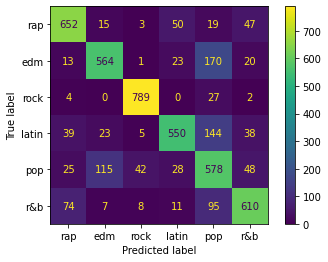

In [ ]:
score, cm = OVOClassifier(data_normed,many_songs_artist)
print("score one vs one class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

score one vs one class :  0.5426741062202934


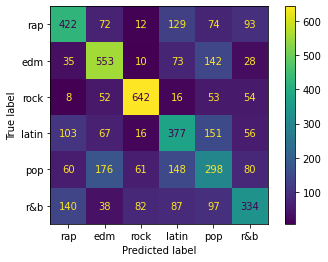

In [ ]:
score, cm = OVOClassifier(normalisation(many_songs_artist),many_songs_artist)
print("score one vs one class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

In [ ]:
def OVRClassifier(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    X_train, X_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
    return clf.score(X_test,y_test), confusion_matrix(y_test, clf.predict(X_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])


score one vs rest class :  0.5490803885100227


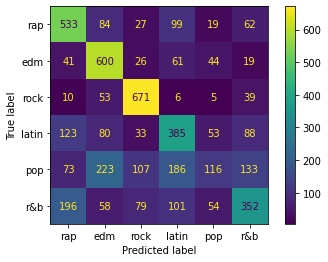

In [ ]:
score, cm = OVRClassifier(normalisation(many_songs_artist),many_songs_artist)
print("score one vs rest class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

score one vs rest class :  0.7726803058483158


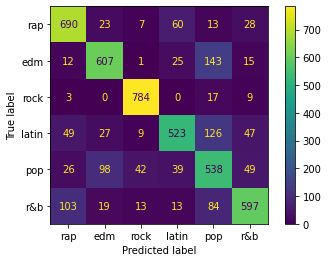

In [ ]:
score, cm = OVRClassifier(data_normed,many_songs_artist)
print("score one vs rest class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

[[-9.99408325e-02 -1.84009211e-01  1.48971031e-02 -7.62785721e-02
  -6.42538156e-02 -5.69465187e-03 -2.96174600e-03  1.28271070e-02
   6.50443761e-02  2.83667558e-02  8.65371238e-02 -4.15468743e-01
  -1.59308685e-01 -7.80791895e-02  7.89726901e-01 -1.36448642e-01
  -1.93899195e-01 -2.21991190e-01]
 [-3.71615531e-02 -1.63978576e-01  1.93801386e-01  8.79294076e-02
  -1.19323641e-01 -1.44986879e-01  1.50822780e-01  3.11802741e-02
  -2.15804126e-01  6.72662331e-02 -5.49128390e-02  1.16928592e-01
  -4.75942488e-01 -3.80082390e-01  9.10210445e-02  2.52815545e-01
  -7.95572624e-02  5.91745550e-01]
 [-4.76098207e-02 -8.08664651e-02 -1.91311021e-01 -9.63246056e-02
  -7.28791962e-02  1.31531502e-01  2.71186332e-02 -3.43310203e-02
  -1.52736977e-01 -5.41870743e-02  3.90237863e-02 -2.77454822e-02
  -4.58775073e-01  7.37705683e-01 -1.07016926e-01  1.08270901e-01
  -3.33897589e-01  5.37130053e-02]
 [ 2.47055099e-01  5.96798097e-02 -1.35744794e-03  2.33682069e-02
  -9.81292220e-02  1.15582967e-01 -1.

<BarContainer object of 5 artists>

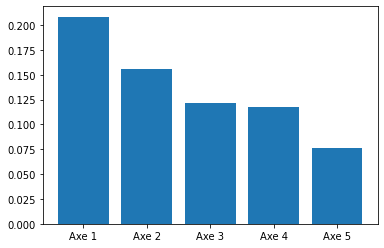

In [ ]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(data_normed)
print(cls.components_)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5",], cls.explained_variance_ratio_)

<AxesSubplot:>

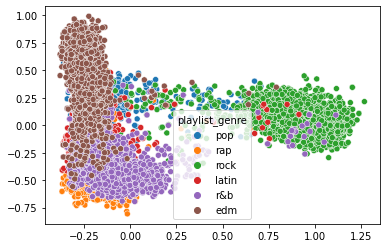

In [ ]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=many_songs_artist.playlist_genre)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>